# Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import re
import seaborn as sns

random.seed(42)
np.random.seed(42)

In [2]:
import warnings
warnings.simplefilter(action='ignore')

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [3]:
print("Чтобы полученные нами были вопроизводимы (т.е. при перезапуске ноутбука мы получали те же цифры)")

Чтобы полученные нами были вопроизводимы (т.е. при перезапуске ноутбука мы получали те же цифры)


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [4]:
df_train = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/hse-mlds/ml/main/hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [5]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [6]:
df_test.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


In [7]:
df_test.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>.
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [8]:
df_train.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,6999,6999.000000,6.999000e+03,6.999000e+03,6999,6999,6999,6999,6797,6797,6803,6796,6797.000000
unique,1924,NaN,NaN,NaN,4,3,2,5,386,120,316,419,NaN
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,NaN
freq,116,NaN,NaN,NaN,3793,5826,6095,4587,197,885,330,468,NaN
mean,NaN,2013.818403,6.395152e+05,6.958462e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.419008
std,NaN,4.053095,8.089419e+05,5.772400e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.965767
min,NaN,1983.000000,2.999900e+04,1.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
25%,NaN,2011.000000,2.549990e+05,3.500000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2015.000000,4.500000e+05,6.000000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.750000e+05,9.700000e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


In [9]:
df_test.describe(include="all")

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
count,1000,1000.000000,1.000000e+03,1000.000000,1000,1000,1000,1000,981,981,981,981,981.000000
unique,621,NaN,NaN,NaN,4,3,2,5,237,88,182,226,NaN
top,Maruti Alto 800 LXI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner,18.6 kmpl,1248 CC,74 bhp,200Nm@ 1750rpm,NaN
freq,15,NaN,NaN,NaN,534,837,877,623,23,116,43,57,NaN
mean,NaN,2013.681000,6.179010e+05,71393.341000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.410805
std,NaN,4.012149,7.585539e+05,48486.218662,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.919985
min,NaN,1995.000000,3.100000e+04,1303.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.000000
25%,NaN,2011.000000,2.500000e+05,37000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
50%,NaN,2014.000000,4.349990e+05,61500.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000
75%,NaN,2017.000000,6.700000e+05,100000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.000000


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [10]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

 В тренировочном датасете есть пропуски в столбцах "mileage", "engine", "max_power", "torque" и "seats". Количество пропусков в каждом столбце можно увидеть в ячейке выше.   

In [11]:
df_test.isna().sum()

name              0
year              0
selling_price     0
km_driven         0
fuel              0
seller_type       0
transmission      0
owner             0
mileage          19
engine           19
max_power        19
torque           19
seats            19
dtype: int64

В тестовом датасете пропуски в тех же столбцах, что и в трейне.

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [12]:
X_train = df_train.copy()
y_train = X_train["selling_price"]
X_train = X_train.drop("selling_price", axis=1)

In [13]:
bool_list = X_train.duplicated()
bool_list.sum()

1159

В трейне 1159 объектов с одинаковым признаковым описанием.

(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [14]:
X_train[~bool_list]

,name,year,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6992,Hyundai Santro Xing GLS,2008,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
6993,Maruti Wagon R VXI BS IV with ABS,2013,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
6994,Hyundai i20 Magna,2013,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
6995,Hyundai Verna CRDi SX,2007,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [15]:
df_train = df_train[~bool_list]

In [16]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [17]:
df_train.reset_index(drop=True, inplace=True)

In [18]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92 kmpl,1086 CC,62.1 bhp,96.1Nm@ 3000rpm,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.9 kmpl,998 CC,67.1 bhp,90Nm@ 3500rpm,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.8 kmpl,1493 CC,110 bhp,"24@ 1,900-2,750(kgm@ rpm)",5.0


Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая:
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``.
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [19]:
df_train["mileage"] = df_train["mileage"].str.replace(r"[^\d+.\d*]", "", regex=True).astype(float)
df_train["engine"] = df_train["engine"].str.replace(r"[^\d+.\d*]", "", regex=True).astype(float)

In [20]:
df_train["max_power"] = df_train["max_power"].replace(r"[^\d+.\d*]", "", regex=True)
df_train["max_power"] = df_train["max_power"].replace(r"\s+", "",regex=True)

In [21]:
df_train[df_train["max_power"] == ""]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
3586,Maruti Omni CNG,2000,80000,100000,CNG,Individual,Manual,Second Owner,10.9,796.0,,NaN,8.0


In [22]:
df_train.at[3586, "max_power"] = np.nan

In [23]:
df_train["max_power"] = df_train["max_power"].astype(float)

In [24]:
df_train = df_train.drop("torque", axis=1)

In [25]:
df_train

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90.00,5.0
3,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.20,5.0
4,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14,1197.0,81.86,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
5835,Hyundai Santro Xing GLS,2008,120000,191000,Petrol,Individual,Manual,First Owner,17.92,1086.0,62.10,5.0
5836,Maruti Wagon R VXI BS IV with ABS,2013,260000,50000,Petrol,Individual,Manual,Second Owner,18.90,998.0,67.10,5.0
5837,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
5838,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110.00,5.0


In [26]:
df_test["mileage"] = df_test["mileage"].str.replace(r"[^\d+.\d*]", "", regex=True).astype(float)
df_test["engine"] = df_test["engine"].str.replace(r"[^\d+.\d*]", "", regex=True).astype(float)
df_test["max_power"] = df_test["max_power"].str.replace(r"[^\d+.\d*]", "", regex=True).astype(float)

In [27]:
df_test = df_test.drop("torque", axis=1)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [28]:
gap_list = ["mileage", "engine", "max_power", "seats"]

for i in gap_list:
  cur_median = df_train[i].median()
  df_train[i] = df_train[i].fillna(cur_median)
  df_test[i] =  df_test[i].fillna(cur_median)

In [29]:
df_train.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [30]:
df_test.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [31]:
print("Потому что с помощью признака seats мы можем разбить автомобили на категории, но не можем сравнивать машины по количеству мест. Например, чем автомобиль с 2 местами лучше, чем автомобиль с 4?")

Потому что с помощью признака seats мы можем разбить автомобили на категории, но не можем сравнивать машины по количеству мест. Например, чем автомобиль с 2 местами лучше, чем автомобиль с 4?


In [32]:
df_train["engine"] = df_train["engine"].astype(int)
df_train["seats"] = df_train["seats"].astype(int)

df_test["engine"] = df_test["engine"].astype(int)
df_test["seats"] = df_test["seats"].astype(int)

In [33]:
df_train.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

In [34]:
df_test.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine             int64
max_power        float64
seats              int64
dtype: object

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

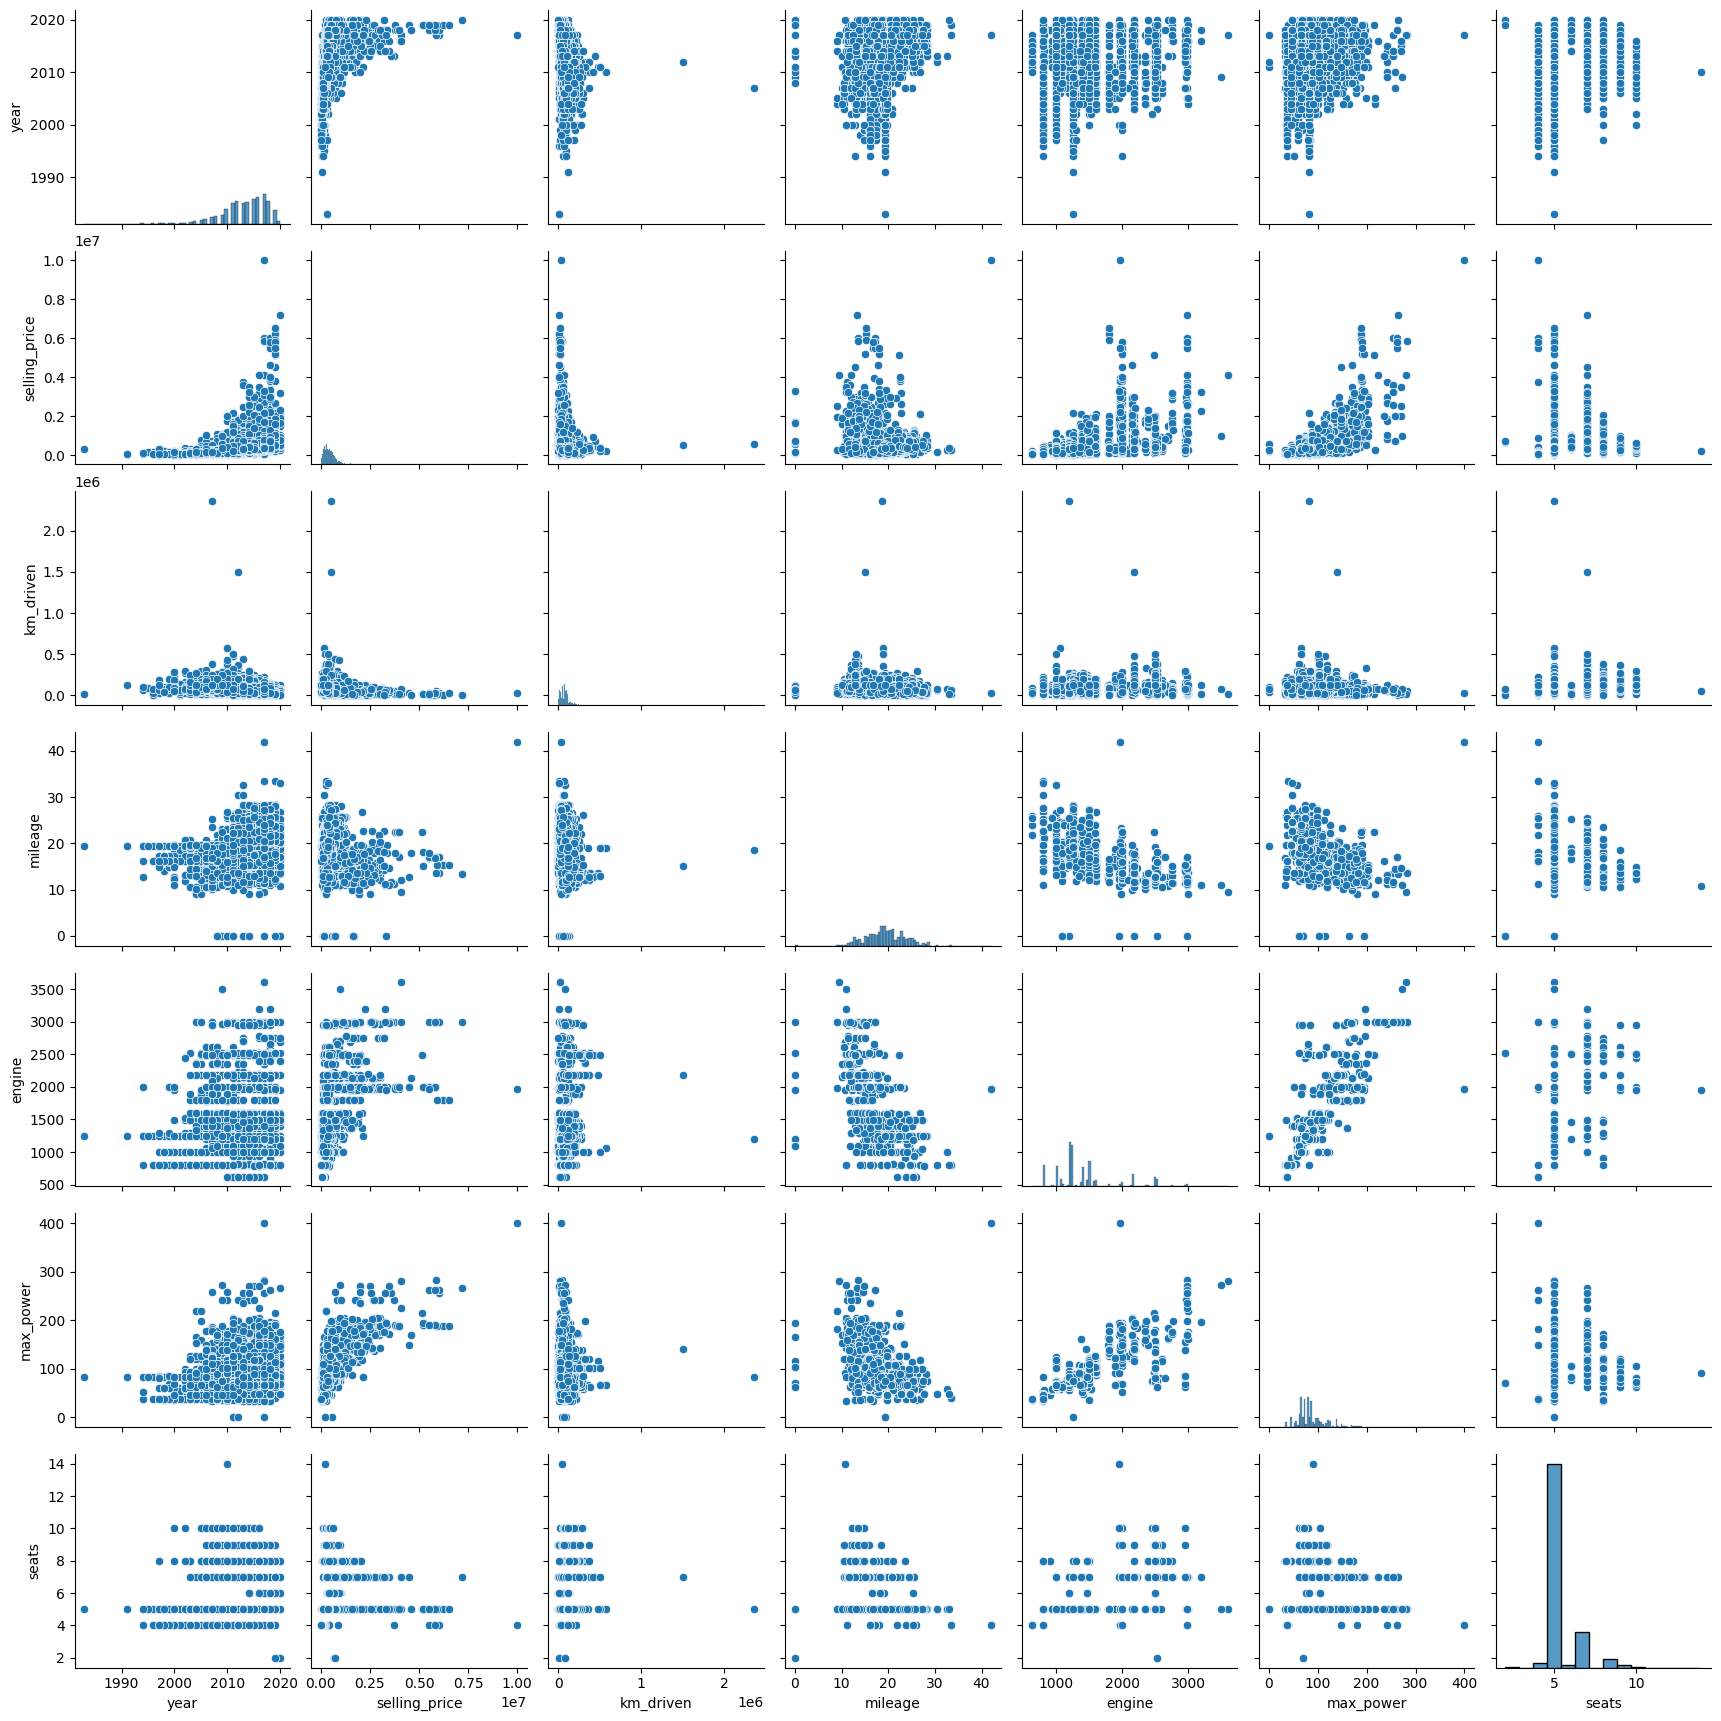

In [35]:
sns.pairplot(df_train)

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

Можно проследить зависимость таргета от всех признаков. Целевая перменная зависит от признака "km_driven" обратно пропорционально. Зависимость от признака "year" напоминает экспоненту. Про зависимость таргета от "mileage", "engine", "max_power" ничего нельзя сказать (по крайней мере мне она ничего не напоминает), но тем не менее зависимость есть. A вот зависимость стоимости машины от количества мест вызывает сомнение. Дальше с помощью L1 регуляризации посмотрим, насколько информативен этот признак при обучении модели.

Про корреляции признаков говорить сложно, одна на графике можно заметить, что некоторые признаки имеют линейную зависимость (например "engine" и "max_power"). Чтобы посмотреть на связь призаков друг с другом, лучше посмотрим на heatmap чуть ниже.

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

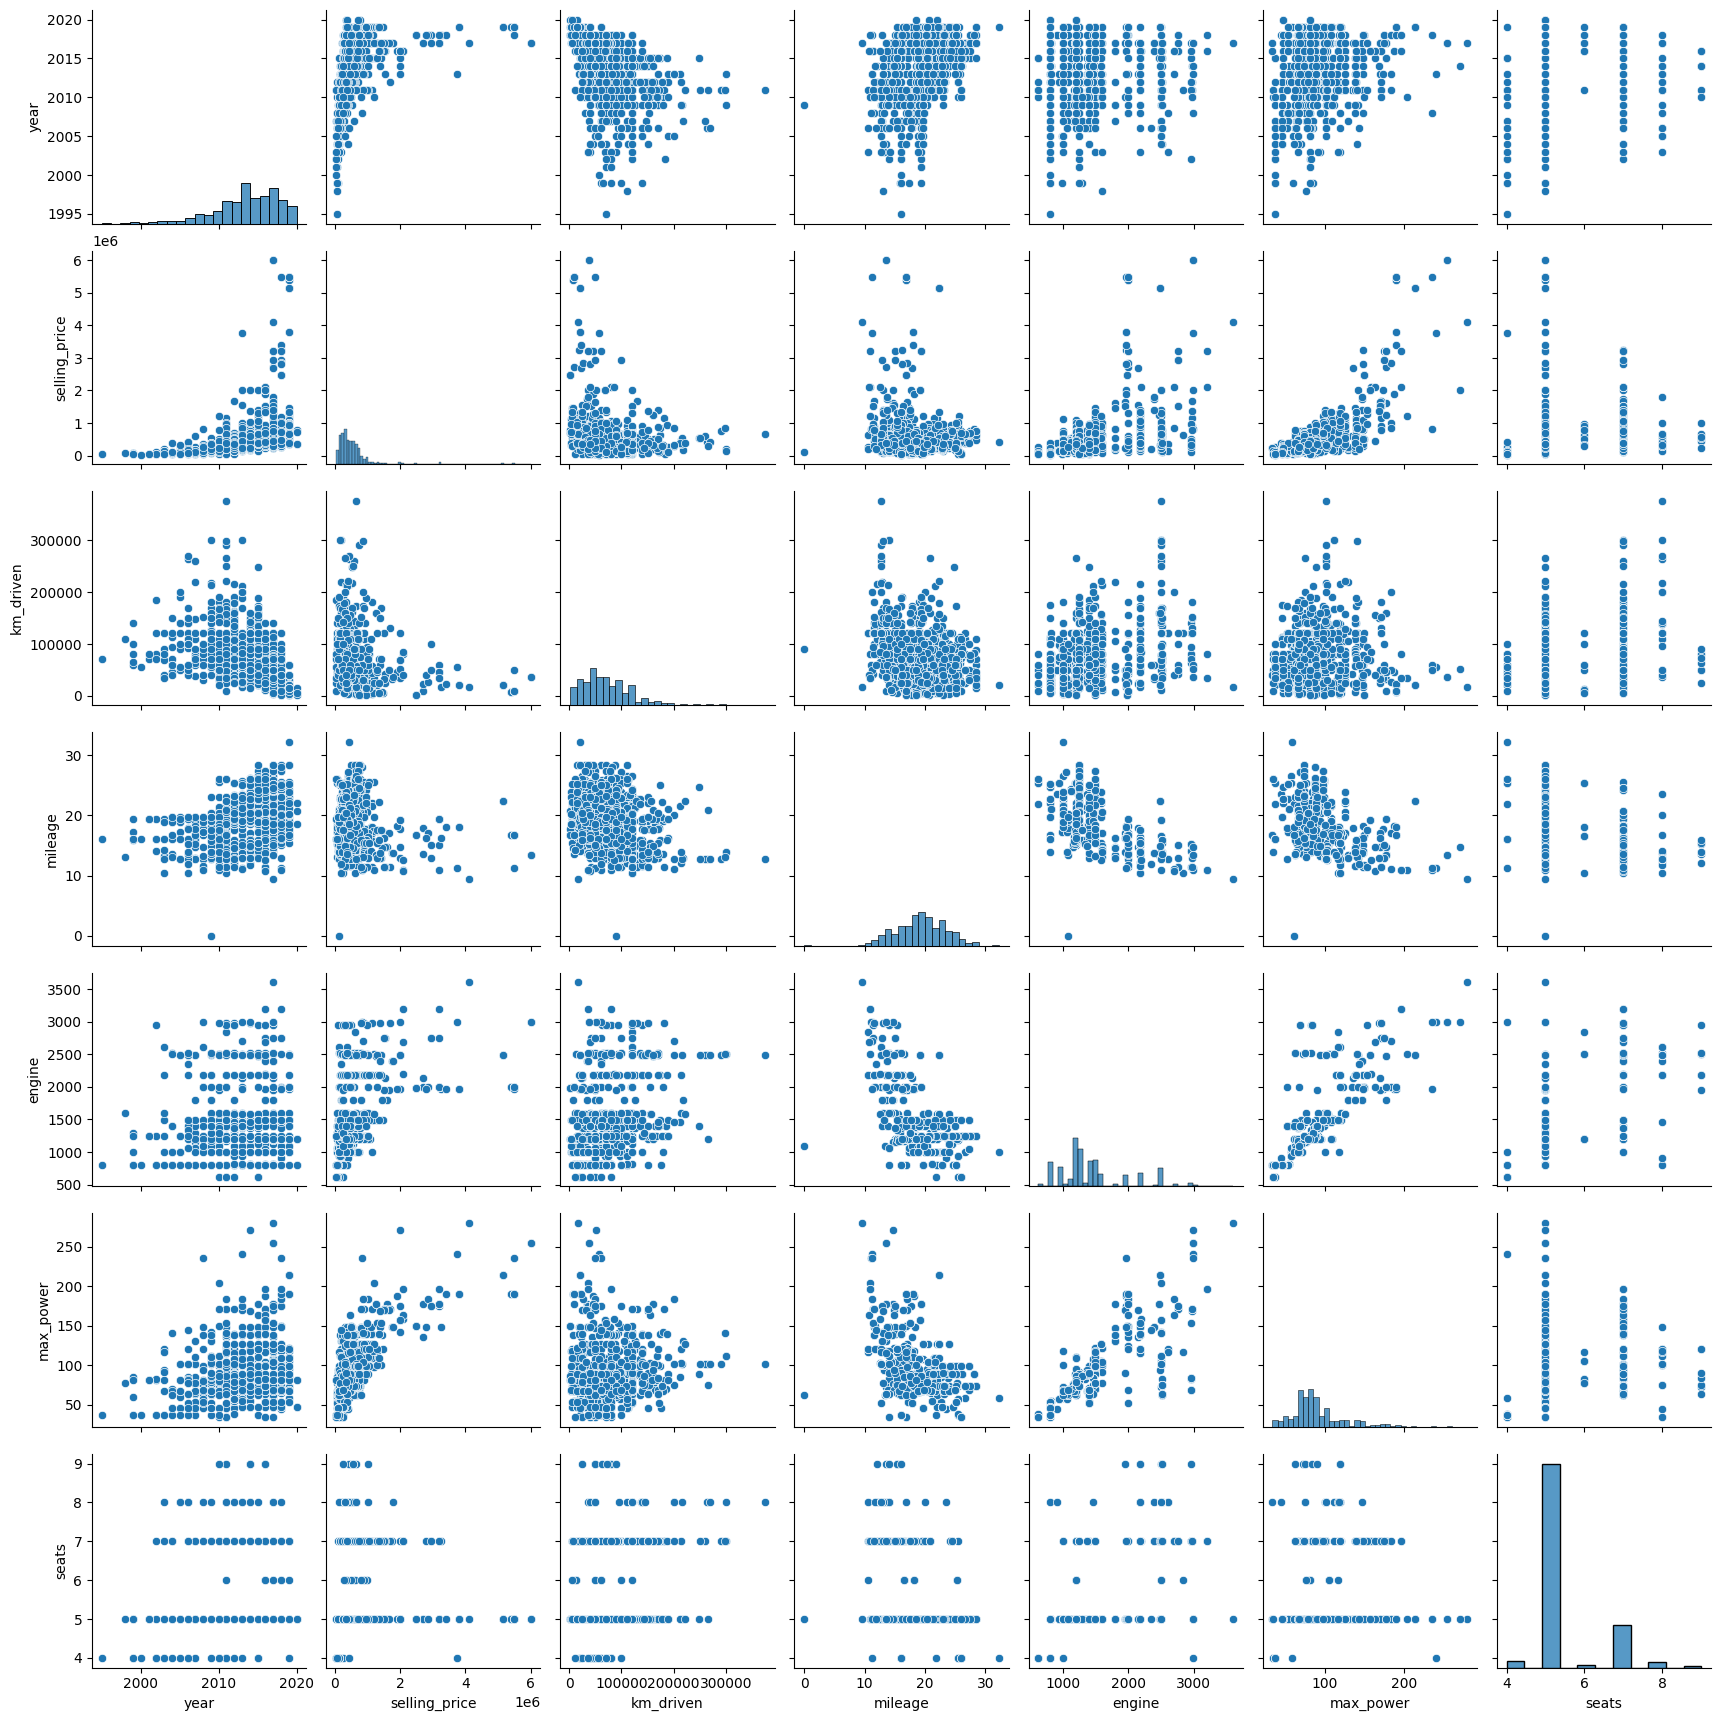

In [36]:
sns.pairplot(df_test)

Сравним два графика, поставив их рядом. Желтым отметим те подграфики, которые похожи, а красным, которые различаются. Можно увидеть, что данные в целом похожи, однако имеются различия.

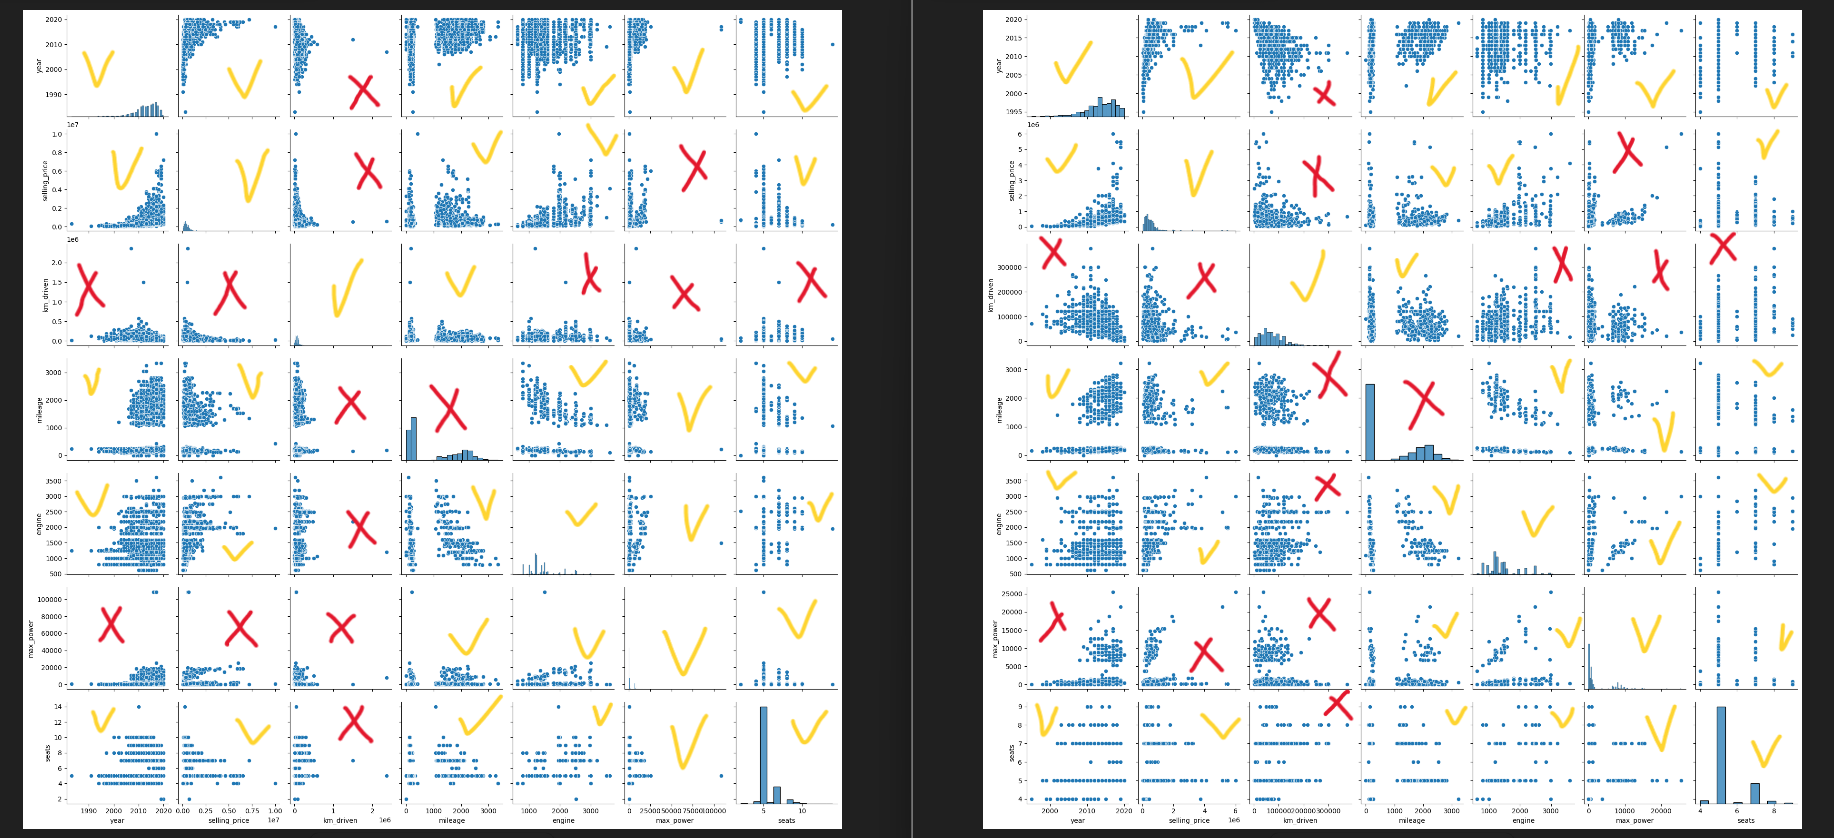

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

In [37]:
df_digits = df_train.select_dtypes(include= np.number)

<Axes: >

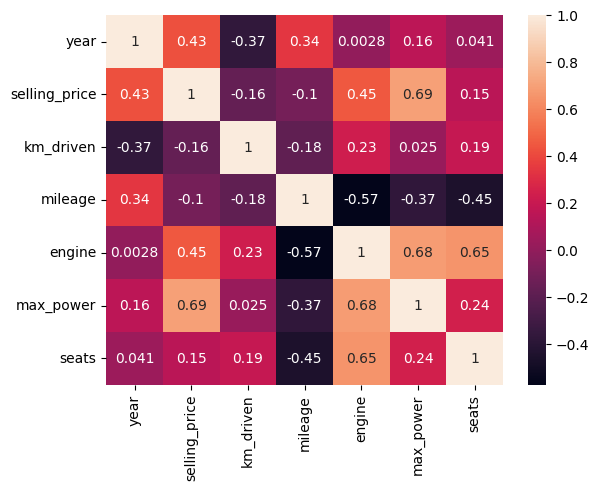

In [38]:
sns.heatmap(df_digits.corr(), annot=True)

Ответьте, пожалуйста, на вопросы:
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

Признак "engine" и "year"  наименее скоррелированы между собой.

Между признаками "engine" и "max_power" наблюдается довольно сильная положительная линейная зависимость.

Да, опираясь на данные можно утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.

(0.25 балла) <font color='#9933CC'> Отобразите диаграммe рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

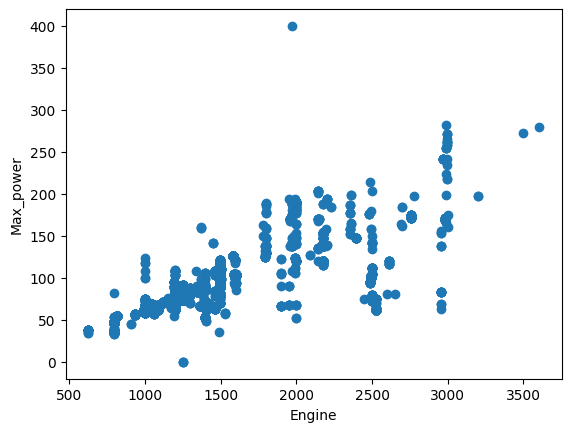

In [39]:
plt.scatter(x = df_train["engine"], y = df_train["max_power"])
plt.xlabel("Engine")
plt.ylabel("Max_power")

plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

Посмотрим на зависимость "mileage" "engine", если верить heatmap, то мы должны увидеть обратную пропорциональность.

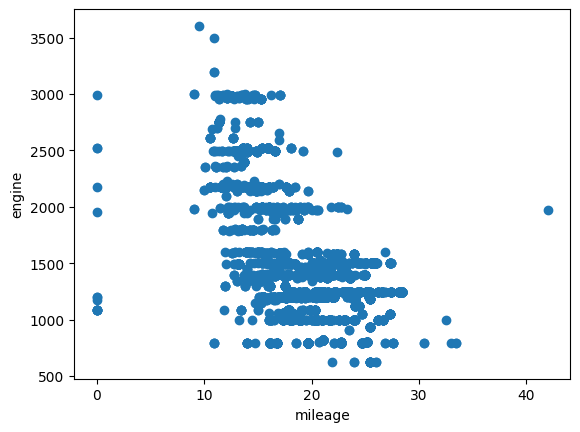

In [40]:
plt.scatter(x = df_train["mileage"], y = df_train["engine"])
plt.xlabel("mileage")
plt.ylabel("engine")

plt.show()

Обратную пропорциальность видно, что изначально казалось странным, потому что казалось бы, чем больше объем, тем больше потребление. А разгадка отказалось простой: у нас данные не в литрах на 100 км, а наоборот, в киломатрах на литр. Так что все логично.

Кажется, что все остальное интересное мы уже проанализировали: графики зависимости таргета от признаков мы уже смотрели, а там находится максимальное значение корреляции 0.69 из heatmap (зависимость "selling_price" от "max_power"). На максимально отрицательную корреляцию мы уже посмотрели выше. Посмотим на вторую положительную корреляцию, потому что она отражает неочевидную связь между объемом двигателя и количеством мест в машине.

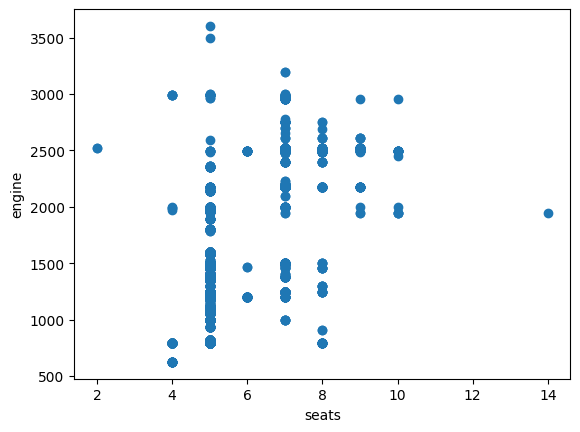

In [41]:
plt.scatter(x = df_train["seats"], y = df_train["engine"])
plt.xlabel("seats")
plt.ylabel("engine")

plt.show()

Из данного графика можно отследит такую тенденцию: с увеличением числа мест в автомобиле увеличивается объем двигателя и сокращается диапозон значений, в который может попасть объем двигателя.

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [42]:
X_train = df_train.copy()
y_train = X_train["selling_price"]
X_train = X_train.drop("selling_price", axis=1)

In [43]:
X_train = X_train.select_dtypes(include= np.number)

In [44]:
assert X_train.shape == (5840, 6)

In [45]:
X_test = df_test.copy()
y_test = X_test["selling_price"]
X_test = X_test.drop("selling_price", axis=1)

In [46]:
X_test = X_test.select_dtypes(include= np.number)

In [47]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [48]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

reg = LinearRegression()
reg.fit(X_train, y_train)
pred_reg_test = reg.predict(X_test)
pred_reg_train = reg.predict(X_train)

r2_reg_train = r2_score(y_train, pred_reg_train)
mse_reg_train = MSE(y_train, pred_reg_train)

r2_reg_test =  r2_score(y_test, pred_reg_test)
mse_reg_test = MSE(y_test, pred_reg_test)

print("Метрики r2 и MSE для трейна:", r2_reg_train, mse_reg_train)
print("Метрики r2 и MSE для теста:", r2_reg_test, mse_reg_test)

Метрики r2 и MSE для трейна: 0.5922591702157316 116874153930.02855
Метрики r2 и MSE для теста: 0.5941419794788428 233298779730.45486


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [49]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_new = scaler.transform(X_train)
X_test_new = scaler.transform(X_test)

reg = LinearRegression()
reg.fit(X_train_new, y_train)
pred_reg_test = reg.predict(X_test_new)
pred_reg_train = reg.predict(X_train_new)

r2_reg_train = r2_score(y_train, pred_reg_train)
mse_reg_train = MSE(y_train, pred_reg_train)

r2_reg_test =  r2_score(y_test, pred_reg_test)
mse_reg_test = MSE(y_test, pred_reg_test)

print("Метрики r2 и MSE для трейна:", r2_reg_train, mse_reg_train)
print("Метрики r2 и MSE для теста:", r2_reg_test, mse_reg_test)

Метрики r2 и MSE для трейна: 0.5922591702157303 116874153930.02892
Метрики r2 и MSE для теста: 0.594141979478852 233298779730.44965


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [50]:
features = X_train.columns.tolist()
features

['year', 'km_driven', 'mileage', 'engine', 'max_power', 'seats']

In [51]:
reg.coef_

array([152772.57084581, -44158.81852005,  28833.92577752,  61178.49433685,
       322807.35325923, -23209.132486  ])

Наибольший вес имеет признак "max_power", а значит он наиболее информативен при предсказнии цены.

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [52]:
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_new, y_train)
pred_lasso_test = lasso.predict(X_test_new)
pred_lasso_train = lasso.predict(X_train_new)

r2_lasso_train = r2_score(y_train, pred_lasso_train)
mse_lasso_train = MSE(y_train, pred_lasso_train)

r2_lasso_test =  r2_score(y_test, pred_lasso_test)
mse_lasso_test = MSE(y_test, pred_lasso_test)

print("Метрики r2 и MSE для трейна:", r2_reg_train, mse_reg_train)
print("Метрики r2 и MSE для теста:", r2_reg_test, mse_reg_test)

Метрики r2 и MSE для трейна: 0.5922591702157303 116874153930.02892
Метрики r2 и MSE для теста: 0.594141979478852 233298779730.44965


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

In [53]:
lasso.coef_

array([152772.3902142 , -44157.68985794,  28832.04339588,  61173.66240922,
       322808.23691947, -23206.25564908])

Нет, не занулила, т.к. используется коэфициент регуляризации маленький для таких весов модели.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [54]:
from sklearn.model_selection import GridSearchCV

reg = Lasso()
parameters = {"alpha":  np.logspace(1, 150)}
grid = GridSearchCV(reg, parameters, cv=10)
grid.fit(X_train_new, y_train)
grid.best_params_

{'alpha': 10985.411419875572}

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [55]:
df_grid = pd.DataFrame.from_dict(grid.cv_results_)
df_grid.shape

(50, 19)

50 моделей

<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

Коэффициент регуляризации у лучшей из перебранных моделей - 10985.411419875572

In [56]:
reg = Lasso(alpha=10985.411419875572)
reg.fit(X_train_new, y_train)
pred_reg_test = reg.predict(X_test_new)
pred_reg_train = reg.predict(X_train_new)

r2_reg_train = r2_score(y_train, pred_reg_train)
mse_reg_train = MSE(y_train, pred_reg_train)

r2_reg_test =  r2_score(y_test, pred_reg_test)
mse_reg_test = MSE(y_test, pred_reg_test)

print("Метрики r2 и MSE для трейна:", r2_reg_train, mse_reg_train)
print("Метрики r2 и MSE для теста:", r2_reg_test, mse_reg_test)

Метрики r2 и MSE для трейна: 0.588810090610373 117862792376.97263
Метрики r2 и MSE для теста: 0.580548891898135 241112474631.14008


In [57]:
reg.coef_

array([152143.86954782, -31492.42321357,   6911.93215058,  15411.4469086 ,
       328930.74561595,     -0.        ])

Да, занулился признак "seats"

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [58]:
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
parameters = {"alpha":  np.logspace(1, 150), "l1_ratio": np.linspace(0.01, 1)}
grid = GridSearchCV(elastic, parameters, cv=10)
grid.fit(X_train_new, y_train)
grid.best_params_

{'alpha': 10.0, 'l1_ratio': 0.9797959183673469}

In [58]:
elastic = ElasticNet(alpha=10.0, l1_ratio=0.9797959183673469)
elastic.fit(X_train_new, y_train)
pred_elastic_test = elastic.predict(X_test_new)
pred_elastic_train = elastic.predict(X_train_new)

r2_elastic_train = r2_score(y_train, pred_elastic_train)
mse_elastic_train = MSE(y_train, pred_elastic_train)

r2_elastic_test =  r2_score(y_test, pred_elastic_test)
mse_elastic_test = MSE(y_test, pred_elastic_test)

print("Метрики r2 и MSE для трейна:", r2_elastic_train, mse_elastic_train)
print("Метрики r2 и MSE для теста:", r2_elastic_test, mse_elastic_test)

Метрики r2 и MSE для трейна: 0.5797455057759 120461049911.83008
Метрики r2 и MSE для теста: 0.5506184969746151 258317320314.71527


<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [59]:
grid.best_params_

{'alpha': 10.0, 'l1_ratio': 0.9797959183673469}

Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.5 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [60]:
X_train_cat = df_train.drop(columns=["name","selling_price"], axis=1)

In [61]:
assert X_train_cat.shape == (5840, 10)

In [62]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot.

In [63]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorial = ["fuel", "seller_type",	"transmission", "owner", "seats"]
numeric = ["year",	"km_driven", "mileage",	"engine",	"max_power"]

scaler = StandardScaler()
encoder = OneHotEncoder(drop="first", sparse_output=False, handle_unknown="ignore")

transformer= ColumnTransformer(transformers=[
    ("cat", encoder, categorial),
    ("num", scaler, numeric)]
)

X_train_cat = transformer.fit_transform(X_train_cat)

In [64]:
X_test_cat = df_test.drop(columns=["name","selling_price"], axis=1)
X_test_cat.shape

(1000, 10)

In [65]:
X_test_cat = transformer.transform(X_test_cat)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [66]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

reg = Ridge()
parameters = {"alpha":  np.logspace(0.1, 150)}
grid = GridSearchCV(reg, parameters, scoring="r2", cv=10)
grid.fit(X_train_cat, y_train)
grid.best_params_

{'alpha': 1.2589254117941673}

In [67]:
ridge = Ridge(alpha=1.2589254117941673)
ridge.fit(X_train_cat, y_train)
pred_ridge_test = ridge.predict(X_test_cat)
pred_ridge_train = ridge.predict(X_train_cat)

r2_ridge_train = r2_score(y_train, pred_ridge_train)
mse_ridge_train = MSE(y_train, pred_ridge_train)

r2_ridge_test =  r2_score(y_test, pred_ridge_test)
mse_ridge_test = MSE(y_test, pred_ridge_test)

print("Метрики r2 и MSE для трейна:", r2_ridge_train, mse_ridge_train)
print("Метрики r2 и MSE для теста:", r2_ridge_test, mse_ridge_test)

Метрики r2 и MSE для трейна: 0.665754773637673 95807496288.55307
Метрики r2 и MSE для теста: 0.6348816134617712 209880474770.80933


Да, наконец-то качетсво предсказаний улучшилось

# Часть 4 - бонусная (1.5 балла) | Feature Engineering

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

Для начала сгенерируем новые признаки:

In [68]:
y_train = df_train["selling_price"]
X_train = df_train.copy()
X_train = X_train.drop("selling_price", axis=1)
X_train = X_train.select_dtypes(include= np.number)

In [69]:
y_test = df_test["selling_price"]
X_test = df_test.copy()
X_test = X_test.drop("selling_price", axis=1)
X_test = X_test.select_dtypes(include= np.number)

In [70]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
X_train_poly = poly.transform(X_train)
X_test_poly = poly.transform(X_test)

In [71]:
scaler = StandardScaler()
scaler.fit(X_train_poly)
X_train_poly = scaler.transform(X_train_poly)
X_test_poly = scaler.transform(X_test_poly)

In [72]:
ridge_poly = Ridge()
parameters = {"alpha":  np.logspace(0.1, 150)}
grid = GridSearchCV(ridge_poly, parameters, scoring="r2", cv=10)
grid.fit(X_train_poly, y_train)
grid.best_params_

{'alpha': 1442.7253854085184}

In [73]:
ridge_poly = Ridge(alpha=1442.7253854085184)
ridge_poly.fit(X_train_poly, y_train)
pred_ridge_poly_test = ridge_poly.predict(X_test_poly)
pred_ridge_poly_train = ridge_poly.predict(X_train_poly)

r2_ridge_poly_train = r2_score(y_train, pred_ridge_poly_train)
mse_ridge_poly_train = MSE(y_train, pred_ridge_poly_train)

r2_ridge_poly_test =  r2_score(y_test, pred_ridge_poly_test)
mse_ridge_poly_test = MSE(y_test, pred_ridge_poly_test)

print("Метрики r2 и MSE для трейна:", r2_ridge_poly_train, mse_ridge_poly_train)
print("Метрики r2 и MSE для теста:", r2_ridge_poly_test, mse_ridge_poly_test)

Метрики r2 и MSE для трейна: 0.6678935399768101 95194443858.96703
Метрики r2 и MSE для теста: 0.6489700314484845 201782049808.27615


До этого самое лучшее качетво было у гребневой регрессии на всех данных, мы его смогли немного улучшить, но при этом у нашей модели изначально были только вещественные признаки. Продолжим с ними работать.

Но теперь, прежде чем генерировать новые признаки, посмотри на старые и попытаемя избавиться в них от выбросов.

In [74]:
X_train = df_train.copy()
X_test = df_test.copy()

Для начала посмотрим на таргет:

<Axes: xlabel='selling_price'>

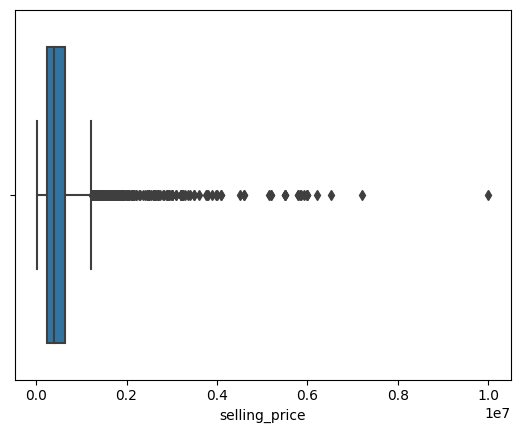

In [75]:
sns.boxplot(x=X_train["selling_price"])

Ну что же, у нас нет автомобилей с отрицательной ценой, уже неплохо. Но вот выбросо справа схватает. Обрежем их по 95 процентилю:

In [76]:
q_95 = X_train["selling_price"].quantile(q=.95)
X_train = X_train[X_train["selling_price"] < q_95]
X_train.shape

(5548, 12)

<Axes: xlabel='selling_price'>

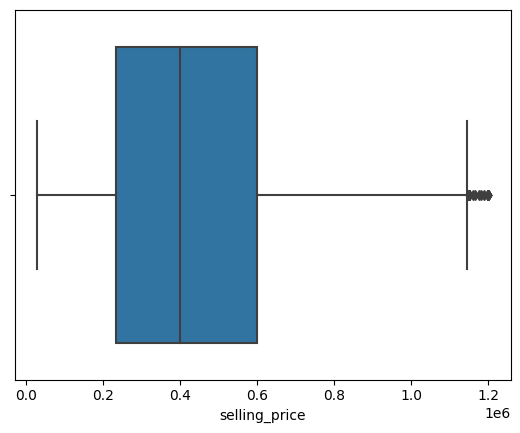

In [77]:
sns.boxplot(x=X_train["selling_price"])

C таргетом разобрались, посмотрим на остальные вещественные признаки:

<Axes: xlabel='year'>

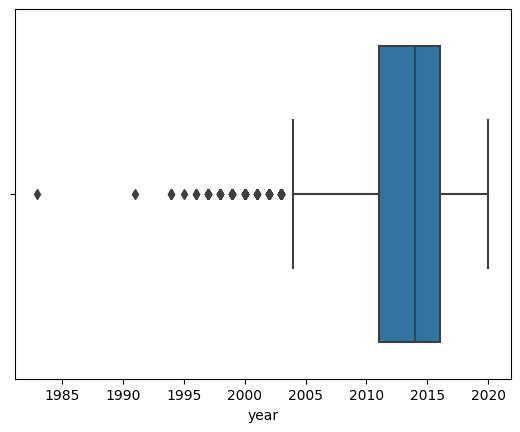

In [78]:
sns.boxplot(x=X_train["year"])

Здесь у нас выбросы слева, обрежем их по 1 квантилю:

In [79]:
q_1 = X_train["year"].quantile(q=.01)
X_train = X_train[X_train["year"] > q_1]
X_train.shape

(5489, 12)

<Axes: xlabel='year'>

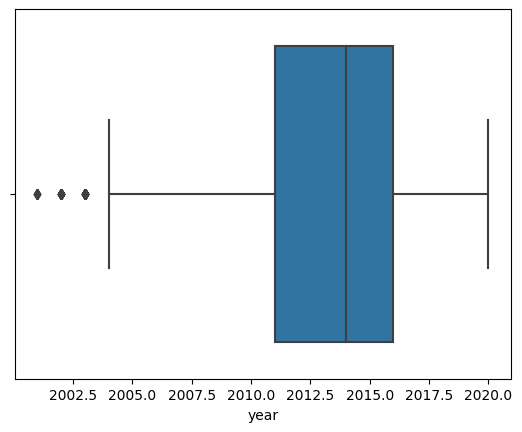

In [80]:
sns.boxplot(x=X_train["year"])

<Axes: xlabel='km_driven'>

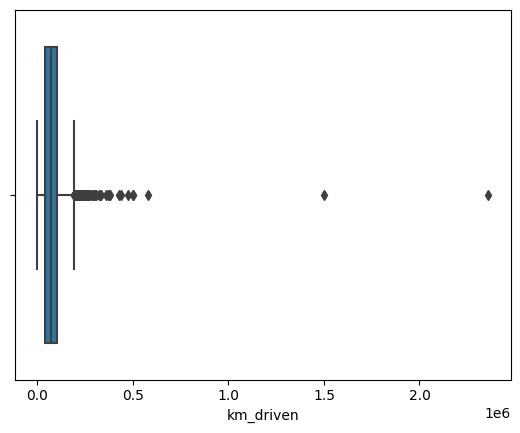

In [81]:
sns.boxplot(x=X_train["km_driven"])

In [82]:
q_99 = X_train["km_driven"].quantile(q=.99)
X_train = X_train[X_train["km_driven"] < q_99]
X_train.shape

(5434, 12)

<Axes: xlabel='km_driven'>

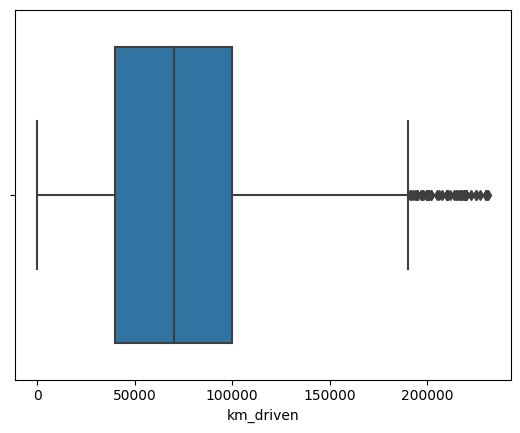

In [83]:
sns.boxplot(x=X_train["km_driven"])

<Axes: xlabel='mileage'>

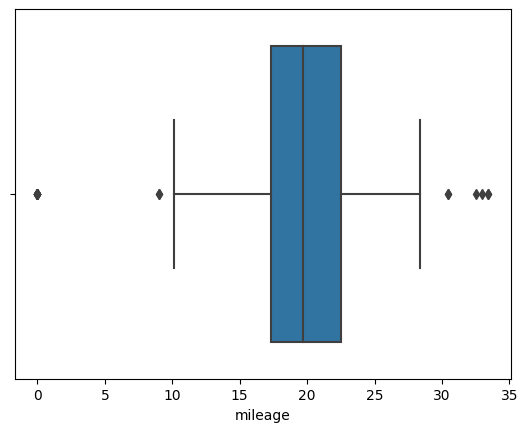

In [84]:
sns.boxplot(x=X_train["mileage"])

In [85]:
q_1 = X_train["mileage"].quantile(q=.01)
q_99 = X_train["mileage"].quantile(q=.99)
X_train = X_train[(X_train["mileage"] < q_99) & (X_train["mileage"] > q_1)]
X_train.shape

(5303, 12)

<Axes: xlabel='mileage'>

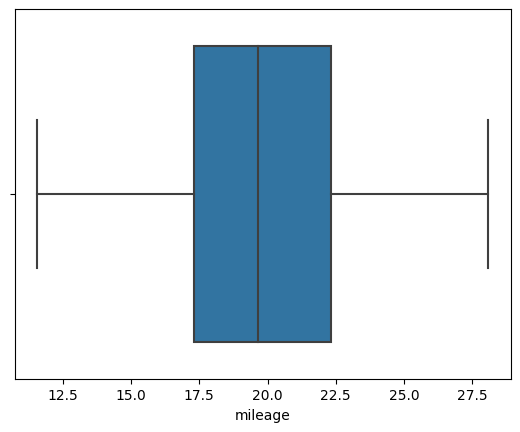

In [86]:
sns.boxplot(x=X_train["mileage"])

<Axes: xlabel='engine'>

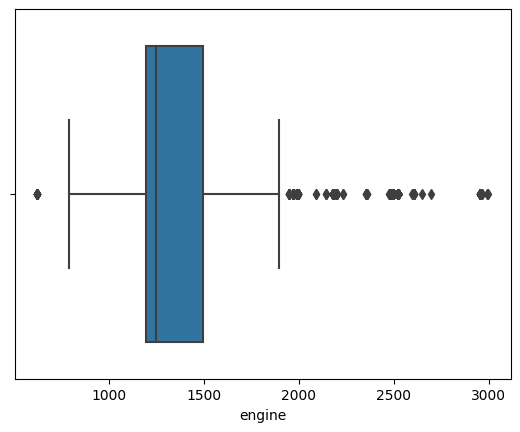

In [87]:
sns.boxplot(x=X_train["engine"])

In [88]:
q_1 = X_train["engine"].quantile(q=.01)
q_99 = X_train["engine"].quantile(q=.99)
X_train = X_train[(X_train["engine"] < q_99) & (X_train["engine"] > q_1)]
X_train.shape

(4803, 12)

<Axes: xlabel='engine'>

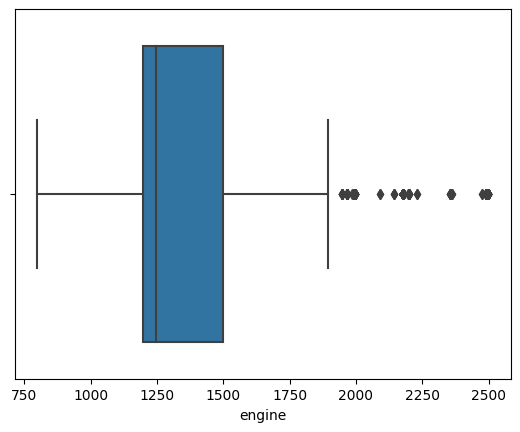

In [89]:
sns.boxplot(x=X_train["engine"])

<Axes: xlabel='max_power'>

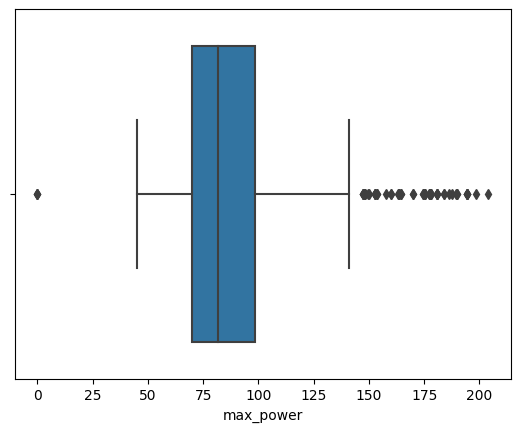

In [90]:
sns.boxplot(x=X_train["max_power"])

In [91]:
q_1 = X_train["max_power"].quantile(q=.01)
q_99 = X_train["max_power"].quantile(q=.99)
X_train = X_train[(X_train["max_power"] < q_99) & (X_train["max_power"] > q_1)]
X_train.shape

(4689, 12)

<Axes: xlabel='max_power'>

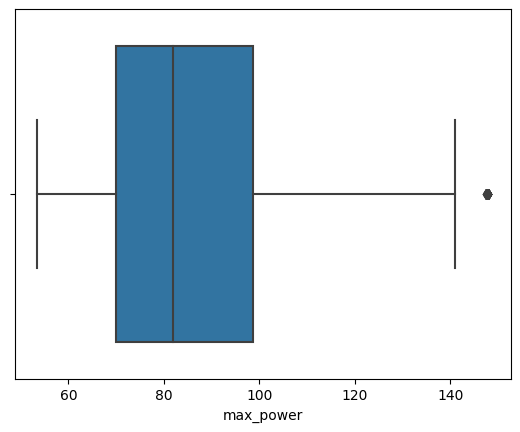

In [92]:
sns.boxplot(x=X_train["max_power"])

Все, с выбросами разобрались. Признак "seats" мы не трогали, т.к. он больше категориальный, чем вещественный. Перейдем к генерации признаков и обучении модели:

In [93]:
y_train = X_train["selling_price"]
X_train = X_train.drop("selling_price", axis=1)
X_train = X_train.select_dtypes(include= np.number)

In [94]:
X_train.shape

(4689, 6)

In [95]:
y_test = df_test["selling_price"]
X_test = X_test.drop("selling_price", axis=1)
X_test = X_test.select_dtypes(include= np.number)

In [96]:
X_test.shape

(1000, 6)

In [97]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train)
X_train_outliers = poly.transform(X_train)
X_test_outliers = poly.transform(X_test)

In [98]:
scaler = StandardScaler()
scaler.fit(X_train_outliers)
X_train_outliers = scaler.transform(X_train_outliers)
X_test_outliers = scaler.transform(X_test_outliers)

In [99]:
ridge_poly_outliers = Ridge()
parameters = {"alpha":  np.logspace(0.1, 150)}
grid = GridSearchCV(ridge_poly_outliers, parameters, scoring="r2", cv=10)
grid.fit(X_train_outliers, y_train)
grid.best_params_

{'alpha': 1.2589254117941673}

In [100]:
ridge_poly_outliers = Ridge(alpha=1.2589254117941673)
ridge_poly_outliers.fit(X_train_outliers, y_train)
pred_ridge_outliers_test = ridge_poly_outliers.predict(X_test_outliers)
pred_ridge_outliers_train = ridge_poly_outliers.predict(X_train_outliers)

r2_ridge_outliers_train = r2_score(y_train, pred_ridge_outliers_train)
mse_ridge_outliers_train = MSE(y_train, pred_ridge_outliers_train)

r2_ridge_outliers_test =  r2_score(y_test, pred_ridge_outliers_test)
mse_ridge_outliers_test = MSE(y_test, pred_ridge_outliers_test)

print("Метрики r2 и MSE для трейна:", r2_ridge_outliers_train, mse_ridge_outliers_train)
print("Метрики r2 и MSE для теста:", r2_ridge_outliers_test, mse_ridge_outliers_test)

Метрики r2 и MSE для трейна: 0.7385734893481628 15652419882.560448
Метрики r2 и MSE для теста: 0.3428412592136564 377753609791.39276


Эх, не вышло, модель переобучилась(

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [101]:
def business_metrics(y_true, y_pred):
  cnt = (abs(y_test - pred_ridge_test) / y_test <= 0.1).sum()
  return cnt / len(y_true)

print("Кастомная метрика:", business_metrics(y_test, pred_ridge_poly_test))

Кастомная метрика: 0.248


# Часть 5 (2.5 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

In [ ]:
from fastapi import FastAPI
from pydantic import BaseModel
from typing import List

app = FastAPI()


class Item(BaseModel):
    name: str
    year: int
    selling_price: int
    km_driven: int
    fuel: str
    seller_type: str
    transmission: str
    owner: str
    mileage: str
    engine: str
    max_power: str
    torque: str
    seats: float


class Items(BaseModel):
    objects: List[Item]


@app.post("/predict_item")
def predict_item(item: Item) -> float:
    return ...


@app.post("/predict_items")
def predict_items(items: List[Item]) -> List[float]:
    return ...

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link